**Этап 1: предобработка текстов**

Я создала функцию для предобработки, которая принимает на вход файл с текстом.

Главное, что нужно сделать на этапе предобработки для любого языка (я беру языки с латинскими алфавитами, поэтому подходы тут везде довольно схожие) -- удалить знаки препинания, привести все слова к нижнему регистру, токенезировать слова. Кроме того, в функции отрезаем первые 7 строчек в каждом файле, т.к. они служебного характера.

У меня два файла с кодом, чтобы не повторять в одном файле код по многу раз. Основной -- этот, т.к. здесь анализурются неочищенные от стоп-слов текстов. Во втором результаты получились очень слабые, но ради интереса можно посмотреть. 

In [5]:
import os
import re
from pprint import pprint
from collections import Counter

In [6]:
import nltk
from nltk.corpus import stopwords

In [1]:
import string
def good_text(fn):
    with open("C:\\Users\\Ksenia\\Documents\\GitHub\\kssamoylenko\\kompling\\langdetect_b_hw\\udhr\\{0}".format(fn), encoding="utf-8") as f:
        lines = f.readlines()
        clean_lines = " ".join([re.sub('[W\d_-]+', ' ', line.lower().strip()) for line in lines][7:])
        clean_lines = clean_lines.translate(str.maketrans('', '', string.punctuation))
        words = re.split(' +', clean_lines)
        return " ".join(words)

In [98]:
#print(good_text('udhr_ita.txt'))

In [99]:
good_ita = good_text('udhr_ita.txt')

Теперь создаем списки наиболее частотных слов и n-граммы:

In [52]:
from collections import Counter
from pprint import pprint

In [53]:
def kj(data, count):
    if (type(data) == str):
        data = re.split(' +', data)
    return sorted(Counter(data).items(), key=lambda item: -item[1])[:count]

Создаем список наиболее частотных слов. Если бы мы использовали списки стоп-слов, большинство из них бы исчезли.

In [100]:
kj(good_ita, 300)

[('di', 91),
 ('e', 89),
 ('diritto', 40),
 ('ogni', 39),
 ('individuo', 37),
 ('il', 30),
 ('della', 30),
 ('articolo', 30),
 ('in', 29),
 ('ha', 29),
 ('o', 27),
 ('la', 26),
 ('a', 26),
 ('diritti', 23),
 ('essere', 23),
 ('alla', 22),
 ('che', 21),
 ('libertà', 21),
 ('dei', 20),
 ('sua', 18),
 ('ed', 17),
 ('ad', 17),
 ('al', 15),
 ('delle', 14),
 ('una', 14),
 ('per', 14),
 ('i', 13),
 ('del', 13),
 ('nazioni', 11),
 ('un', 11),
 ('dichiarazione', 10),
 ('umani', 10),
 ('è', 10),
 ('sia', 10),
 ('le', 10),
 ('non', 9),
 ('tutti', 9),
 ('hanno', 9),
 ('nella', 9),
 ('potrà', 9),
 ('deve', 9),
 ('unite', 8),
 ('nel', 8),
 ('stato', 8),
 ('da', 8),
 ('nessun', 8),
 ('considerato', 7),
 ('con', 7),
 ('cui', 6),
 ('internazionale', 6),
 ('famiglia', 6),
 ('gli', 6),
 ('contro', 6),
 ('sociale', 6),
 ('dalla', 6),
 ('proprio', 6),
 ('ai', 6),
 ('universale', 5),
 ('questa', 5),
 ('dignità', 5),
 ('fondamentali', 5),
 ('vita', 5),
 ('rispetto', 5),
 ('presente', 5),
 ('società', 5),
 ('

In [101]:
def ngram(str, n):
    s = str.split()
    ngrams = [" ".join(s[i:i+n]) for i in range (len(s)-n+1)]
    return kj(Counter(ngrams), 150)

In [102]:
ita_ngrm = ngram(good_ita, 2)
#print(ita_ngrm)

In [103]:
ita_str = '\n'.join(["{0}".format(s[0]) for s in ita_ngrm])
print(ita_str)

ogni individuo
ha diritto
individuo ha
articolo ogni
e di
diritto di
dei diritti
diritto ad
diritti e
nazioni unite
diritti umani
diritto alla
potrà essere
delle nazioni
considerato che
libertà di
nessun individuo
della sua
deve essere
individuo potrà
il diritto
e della
e delle
o di
alla libertà
ad una
universale dei
tutti i
i diritti
le nazioni
delle libertà
per la
presente dichiarazione
tutte le
articolo nessun
hanno diritto
nella sua
dichiarazione universale
questa dichiarazione
della libertà
e il
di un
in cui
i popoli
il rispetto
di questi
questi diritti
della società
di religione
alla sicurezza
e la
essere sottoposto
sua personalità
dalla legge
essere arbitrariamente
ad un
dei suoi
di ogni
sua famiglia
proprio paese
o in
sviluppo della
lassemblea generale
il testo
lingue ufficiali
ogni mezzo
che il
il riconoscimento
riconoscimento della
a tutti
e dei
il fondamento
della pace
gli esseri
esseri umani
di credo
credo e
che è
è indispensabile
che i
costretto a
contro la
dignità e
di pr

In [104]:
with open('ita_top.txt', 'w', encoding="utf-8") as file:
    file.write(ita_str)

 А теперь для других языков. Возьмем, например, французский, испанский, английский, немецкий, датский и румынский - алфавиты у всех латинские, поэтому правила предобработки не меняются, хотя есть отличия в диакритических знаках и т.д. Чтобы не занимать места, все способы распечатать списки закомментированы.
Применяем функцию предобработки и собираем н-граммы.

In [105]:
good_fra = good_text('udhr_fra.txt')

In [61]:
fra_ngrm = ngram(good_fra, 2)
#print(fra_ngrm)

In [62]:
fra_str = '\n'.join(["{0}".format(s[0]) for s in fra_ngrm])
#print(fra_str)

In [63]:
with open('fra_top.txt', 'w', encoding="utf-8") as file:
    file.write(fra_str)

In [64]:
good_spa = good_text('udhr_spa.txt')

In [66]:
spa_ngrm = ngram(good_spa, 2)
#print(spa_ngrm)

In [67]:
spa_str = '\n'.join(["{0}".format(s[0]) for s in spa_ngrm])
#print(spa_str)

In [68]:
with open('spa_top.txt', 'w', encoding="utf-8") as file:
    file.write(spa_str)

In [69]:
good_eng = good_text('udhr_eng.txt')
eng_ngrm = ngram(good_eng, 2)
eng_str = '\n'.join(["{0}".format(s[0]) for s in eng_ngrm])
#print(eng_str)

In [70]:
with open('eng_top.txt', 'w', encoding="utf-8") as file:
    file.write(eng_str)

In [71]:
good_deu = good_text('udhr_deu_1996.txt')
deu_ngrm = ngram(good_deu, 2)
deu_str = '\n'.join(["{0}".format(s[0]) for s in deu_ngrm])
#print(deu_str)

In [72]:
with open('deu_top.txt', 'w', encoding="utf-8") as file:
    file.write(deu_str)

In [73]:
good_dan = good_text('udhr_dan.txt')
dan_ngrm = ngram(good_dan, 2)
dan_str = '\n'.join(["{0}".format(s[0]) for s in dan_ngrm])
#print(dan_str)

In [74]:
with open('dan_top.txt', 'w', encoding="utf-8") as file:
    file.write(dan_str)

In [75]:
good_rmn = good_text('udhr_rmn.txt')
rmn_ngrm = ngram(good_rmn, 2)
rmn_str = '\n'.join(["{0}".format(s[0]) for s in rmn_ngrm])
#print(rmn_str)

In [76]:
with open('rmn_top.txt', 'w', encoding="utf-8") as file:
    file.write(rmn_str)

Итак, мы записали файлы с наиболее частотными биграммами. Проверим теперь пересечения для разных языков. Перебираем не все языки, а те, где мы ожидаем увидеть пересечения.

In [107]:
set_spa = set(spa_ngrm)
set_ita = set(ita_ngrm)
set_deu = set(deu_ngrm)
set_fra = set(fra_ngrm)
set_eng = set(eng_ngrm)
set_rmn = set(rmn_ngrm)
set_dan = set(dan_ngrm)

In [108]:
print(len(set_ita & set_spa))
print(set_ita & set_spa)
print(len(set_ita & set_fra))
print(len(set_ita & set_rmn))
print(len(set_spa & set_fra))
print(set_spa & set_fra)
print(len(set_eng & set_fra))
print(len(set_eng & set_deu))
print(len(set_eng & set_dan))
print(len(set_eng & set_rmn))
print(len(set_dan & set_deu))
print(set_dan & set_deu)

1
{('la presente', 2)}
0
0
1
{('que la', 3)}
0
0
0
0
1
{('artikel alle', 3)}


Пересечений оказалось немного больше, чем для очищенных от стоп-слов текстов, но все равно не очень много. Проверим для слов-одиночек:


In [109]:
set_lnl_spa = set(kj(good_spa, 300))
set_lnl_ita = set(kj(good_ita, 300))
set_lnl_deu = set(kj(good_deu, 300))
set_lnl_fra = set(kj(good_fra, 300))
set_lnl_eng = set(kj(good_eng, 300))
set_lnl_rmn = set(kj(good_rmn, 300))
set_lnl_dan = set(kj(good_dan, 300))

In [110]:
print(len(set_lnl_ita & set_lnl_spa))
print(set_lnl_ita & set_lnl_spa)
print(len(set_lnl_ita & set_lnl_fra))
print(set_lnl_ita & set_lnl_fra)
print(len(set_lnl_ita & set_lnl_rmn))
print(len(set_lnl_spa & set_lnl_fra))
print(set_lnl_spa & set_lnl_fra)
print(len(set_lnl_eng & set_lnl_fra))
print(set_lnl_eng & set_lnl_fra)
print(len(set_lnl_eng & set_lnl_spa))
print(len(set_lnl_eng & set_lnl_ita))
print(len(set_lnl_eng & set_lnl_deu))
print(len(set_lnl_eng & set_lnl_rmn))
print(set_lnl_eng & set_lnl_rmn)
print(len(set_lnl_eng & set_lnl_dan))
print(set_lnl_dan & set_lnl_eng)
print(len(set_lnl_dan & set_lnl_deu))
print(set_lnl_dan & set_lnl_deu)

6
{('momento', 2), ('un', 11), ('proclama', 1), ('barbarie', 1), ('arbitrariamente', 3), ('base', 2)}
1
{('barbarie', 1)}
0
2
{('ni', 5), ('barbarie', 1)}
10
{('race', 2), ('relations', 1), ('religion', 5), ('conscience', 3), ('importance', 1), ('justice', 1), ('nations', 8), ('aspiration', 1), ('respect', 4), ('article', 30)}
0
0
0
1
{('status', 2)}
1
{('man', 1)}
1
{('artikel', 30)}


Вот здесь получается любопытно: общих слов-одиночек оказалось меньше, чем для очищенных текстов (для пересечений испанского с ильаняским и французского с английским). Видимо, это связано с тем, что место в топах плотно заняли служебные слова.


Итак, мы создали файлы для наиболее частотных сочетаний для семи языков. Далее нам нужно построить матрицу их схожести и визуализировать ее.

In [2]:
start_path = 'C:\\Users\\Ksenia\\Documents\\GitHub\\kssamoylenko\\kompling\\langdetect_b_hw\\lang_top'

In [112]:
texts = []
for path, dirs, files in os.walk(start_path):
    for fname in files[:10]:
        if not fname.startswith('.'):   
            with open(os.path.join(path, fname), encoding='cp1251') as f:
                raw_text = f.read()
                text = '\n'.join([line for line in raw_text.split('\n') if ':' not in line and line.strip()])
                texts.append(text)
print(len(texts), 'files.')


7 files.


In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.spatial.distance import pdist, squareform
import sys
from pprint import pprint

In [114]:
vectorizer = TfidfVectorizer(ngram_range=(2, 2), 
                             min_df=0.1,   
                             max_df=0.9)  
tfidf = vectorizer.fit_transform(texts)
print("tfidf shape:", tfidf.shape)

tfidf shape: (7, 1872)


In [115]:
type(tfidf)

scipy.sparse.csr.csr_matrix

In [116]:
words = vectorizer.get_feature_names() 
print(len(words), 'words')
print(words[:10])

1872 words
['achtung vor', 'act the', 'acte dг', 'acte ou', 'ad diritti', 'ad essere', 'ad limitazione', 'ad un', 'ad una', 'af afgгёrende']


In [117]:
tfidf_ = tfidf.toarray()     
print('tfidf array shape:', tfidf_.shape)
print(type(tfidf_))

tfidf array shape: (7, 1872)
<class 'numpy.ndarray'>


In [118]:
type(tfidf.todense())

numpy.matrixlib.defmatrix.matrix

In [119]:
tfidf = tfidf_

In [120]:
doc = tfidf[-1]      
print(type(doc), doc.shape)
#print(doc)
scores = list(doc)

<class 'numpy.ndarray'> (1872,)


In [121]:
word_scores = list(zip(scores, words))

top = sorted(word_scores, reverse=True)[:20]      
for score, word in top:
    print(word, '{0:.6f}'.format(score))

artг culo 0.229928
de la 0.143145
tiene la 0.114964
su la 0.114964
los derechos 0.114964
igual protecciгіn 0.114964
en los 0.114964
en en 0.114964
el que 0.114964
el el 0.114964
derecho la 0.114964
de las 0.114964
vida los 0.057482
vida la 0.057482
unidas una 0.057482
una persona 0.057482
una derechos 0.057482
un sus 0.057482
un que 0.057482
un fin 0.057482


In [122]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(tfidf)
print(similarities.shape)
print(similarities)

(7, 7)
[[ 1.          0.00578474  0.          0.          0.          0.          0.        ]
 [ 0.00578474  1.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.00224735  0.
   0.03204266]
 [ 0.          0.          0.          0.00224735  1.          0.
   0.00479041]
 [ 0.          0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.03204266  0.00479041  0.          1.        ]]


In [123]:
cosine_similarity(tfidf[0:5,:])

array([[ 1.        ,  0.00578474,  0.        ,  0.        ,  0.        ],
       [ 0.00578474,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.00224735],
       [ 0.        ,  0.        ,  0.        ,  0.00224735,  1.        ]])

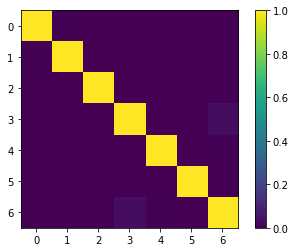

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(similarities[:100, :100])
plt.colorbar()
plt.show()

Видим небольшое пересечение между языками 6 и 3, т.е. французским и испанским (общий биграм в топах у них встречался чуть чаще).